In [2]:
import torch
import mmcv
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [4]:
# Specify the path to checkpoint and config files
config_file = '../configs/OrgSegNet/OrgSeg_PlantCell_768x512.py'
checkpoint_file = '../checkpoints/OrgSegNet_iter_Version1.pth'

In [5]:
# build the model from a config file and a checkpoint file
device = 'cuda:0' if torch.cuda.is_available() else "cpu"
model = init_model(config_file, checkpoint_file, device=device)

/home/MelonSeg/OrgSegNet/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/MelonSeg/OrgSegNet/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ../checkpoints/OrgSegNet_iter_Version1.pth


In [6]:
# test a single image
img = './demo_images/demo1.tif'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

06/15 21:04:01 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


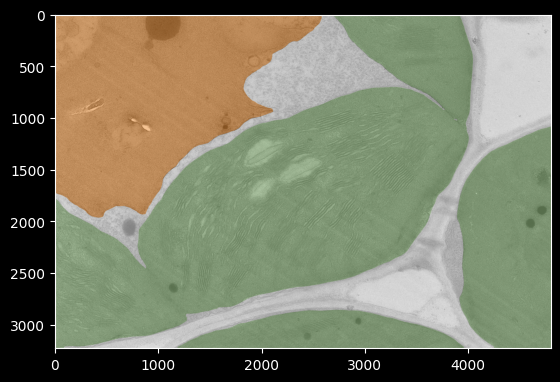

In [7]:
# show the results
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))